In [1]:
import ast
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Have to write parser since DF.append doesn't work in-place (whoops)

In [2]:
with open('./data/raw_output.txt') as text_output:
    output_lines = text_output.readlines()
    
output_lines[0:40]

["{'dropout_rate': 0.3508732833552391, 'hidden1': 50, 'hidden2': 11, 'layer_type': 'lstm'}\n",
 '_________________________________________________________________\n',
 'Layer (type)                 Output Shape              Param #   \n',
 '=================================================================\n',
 'input_1 (InputLayer)         (None, 256, 7)            0         \n',
 '_________________________________________________________________\n',
 'bidirectional (Bidirectional (None, 256, 100)          23200     \n',
 '_________________________________________________________________\n',
 'bidirectional_1 (Bidirection (None, 256, 22)           9856      \n',
 '_________________________________________________________________\n',
 'dense (Dense)                (None, 256, 4)            92        \n',
 '=================================================================\n',
 'Total params: 33,148\n',
 'Trainable params: 33,148\n',
 'Non-trainable params: 0\n',
 '_______________________

In [3]:
def parse_model_output(start_idx, dataframe):
    '''Return next_idx, dataframe (with new row appended)'''
    if len(output_lines) - start_idx < 10:
        return start_idx+100, dataframe
    
    model_info = ast.literal_eval(output_lines[start_idx])
    val_losses, val_accs = [], []
    
    # iterate until beginning of next model
    i = start_idx + 1
    while '{' not in output_lines[i]:
        line = output_lines[i]
        if 'val_loss' not in line:
            i += 1
            continue
        else:
            val_loss_loc = line.find('val_loss')
            loss_acc = re.findall(r'[\d\.\d]+', line[val_loss_loc:])
            val_losses.append(float(loss_acc[0]))
            val_accs.append(float(loss_acc[1]))
            i += 1
    
    model_info['val_loss'] = min(val_losses)
    model_info['val_acc'] = max(val_accs)
    model_info['best_loss_epoch'] = np.argmin(val_losses)
    model_info['best_acc_epoch'] = np.argmax(val_accs)
    
    return i, dataframe.append(model_info, ignore_index=True)
    
    

results_df = pd.DataFrame(columns=['dropout_rate', 'hidden1', 'hidden2', 'layer_type', 'val_loss', 'val_acc',
                                  'best_loss_epoch', 'best_acc_epoch'])

next_idx = 0
while next_idx < len(output_lines):
    next_idx, results_df = parse_model_output(next_idx, results_df)

results_df.sort_values('val_loss', inplace=True)
results_df

,dropout_rate,hidden1,hidden2,layer_type,val_loss,val_acc,best_loss_epoch,best_acc_epoch
77,0.339393,38,7,lstm,1.2366,0.4713,2,2
98,0.077783,57,23,lstm,1.2406,0.5090,0,4
0,0.350873,50,11,lstm,1.2503,0.5008,2,6
34,0.339090,28,33,gru,1.2555,0.4881,6,9
88,0.259715,9,48,gru,1.2568,0.4635,5,7
23,0.449961,15,40,gru,1.2598,0.4184,6,6
17,0.300740,25,13,gru,1.2605,0.4768,4,9
2,0.284596,22,55,gru,1.2617,0.4860,2,8
84,0.515012,60,28,gru,1.2618,0.4470,8,8
82,0.204665,55,9,gru,1.2624,0.4855,3,9


In [26]:
print(results_df.val_acc.max())
results_df[results_df.best_loss_epoch > 5]

0.5262


,dropout_rate,hidden1,hidden2,layer_type,val_loss,val_acc,best_loss_epoch,best_acc_epoch,hidden_ratio
34,0.339090,28,33,gru,1.2555,0.4881,6,9,1.17857
23,0.449961,15,40,gru,1.2598,0.4184,6,6,2.66667
84,0.515012,60,28,gru,1.2618,0.4470,8,8,0.466667
56,0.378753,17,11,gru,1.2632,0.4080,9,7,0.647059
43,0.190378,14,10,gru,1.2670,0.4756,8,7,0.714286
61,0.559247,50,10,gru,1.2706,0.4360,8,8,0.2
96,0.236074,62,57,gru,1.2751,0.4941,6,8,0.919355
75,0.124442,29,17,gru,1.2780,0.4975,6,7,0.586207
86,0.411319,49,26,gru,1.2835,0.4615,6,8,0.530612
73,0.594867,63,13,gru,1.2859,0.3875,9,9,0.206349


## `lstm` vs `gru`

It looks like `gru`s are better in the average case, train faster, and peak later in the training cycle. Not as good as the best `lstm`s, but those `lstm`s peak extremely early (epoch < 2) which makes them suspect.

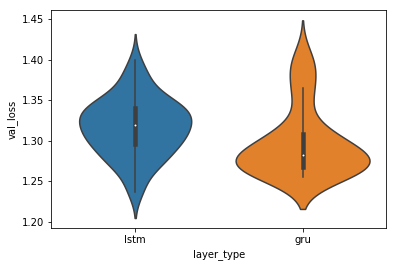

In [4]:
sns.violinplot(x='layer_type', y='val_loss', data=results_df)

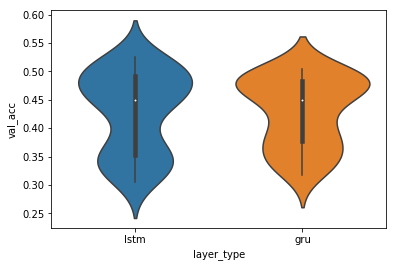

In [5]:
sns.violinplot(x='layer_type', y='val_acc', data=results_df)

# Hidden layer sizes

In [6]:
results_df['hidden_ratio'] = results_df.hidden2 / results_df.hidden1
lstm_results = results_df[results_df.layer_type == 'lstm']
gru_results = results_df[results_df.layer_type == 'gru']

(0, 3)

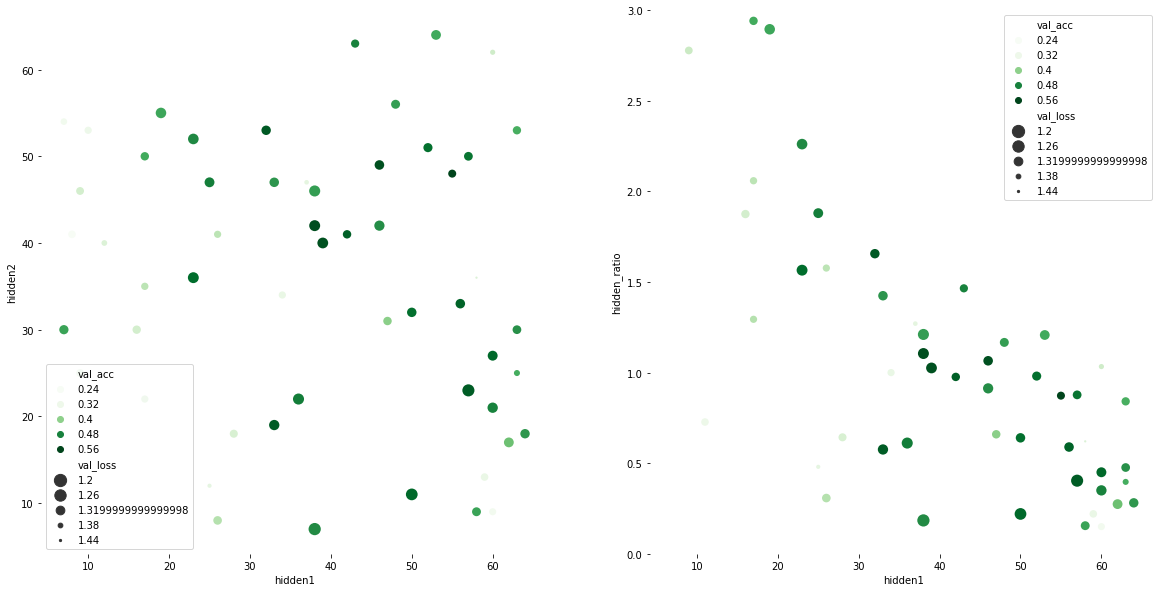

In [34]:
f, ax = plt.subplots(ncols=2, figsize=(20, 10))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="hidden1", y="hidden2",
                hue="val_acc", size="val_loss",
                sizes=(150, 5), linewidth=0,
                palette='Greens',
                data=lstm_results, ax=ax[0])

sns.scatterplot(x="hidden1", y="hidden_ratio",
                hue="val_acc", size="val_loss",
                sizes=(150, 5), linewidth=0,
                palette='Greens',
                data=lstm_results, ax=ax[1])
ax[1].set_ylim(0,3)

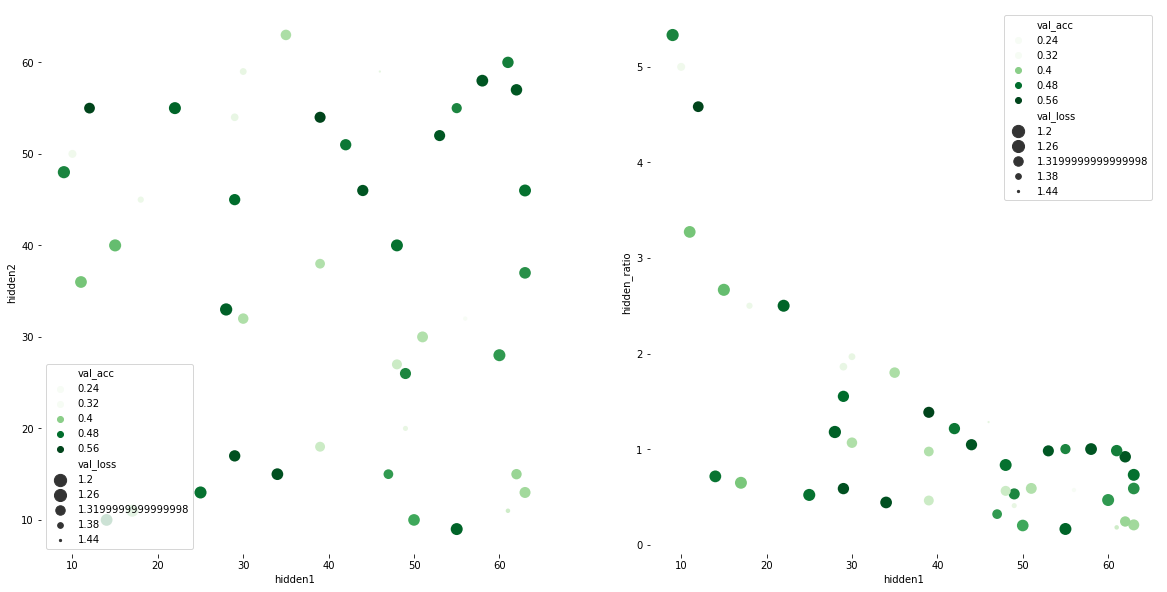

In [36]:
f, ax = plt.subplots(ncols=2, figsize=(20, 10))

sns.despine(f, left=True, bottom=True)

sns.scatterplot(x="hidden1", y="hidden2",
                hue="val_acc", size="val_loss",
                sizes=(150, 5), linewidth=0,
                palette='Greens',
                data=gru_results, ax=ax[0])

sns.scatterplot(x="hidden1", y="hidden_ratio",
                hue="val_acc", size="val_loss",
                sizes=(150, 5), linewidth=0,
                palette='Greens',
                data=gru_results, ax=ax[1])
#ax[1].set_ylim(0,3)

`LSTM` networks seem to do better with `hidden1 >= hidden2`, while `GRU`s seem to be

## `pairplot`s

In [8]:
dep_vars = ['val_loss', 'val_acc', 'best_loss_epoch', 'best_acc_epoch']
indep_vars = ['hidden1', 'hidden_ratio', 'dropout_rate']

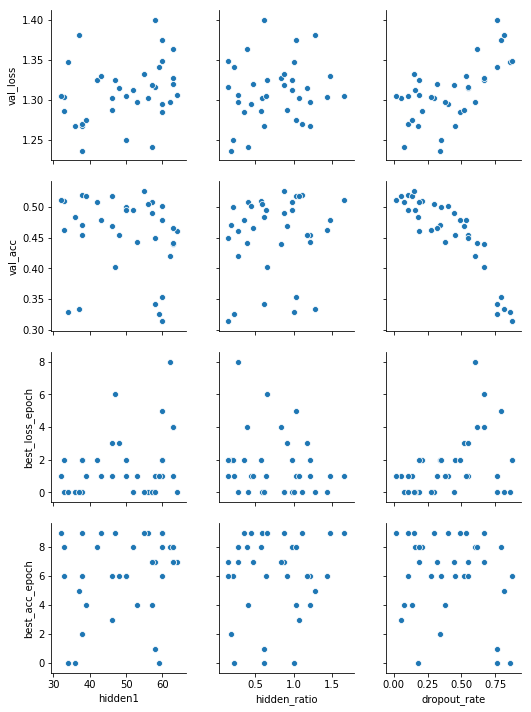

In [9]:
sns.pairplot(lstm_results[lstm_results.hidden1 > 30], x_vars=indep_vars, y_vars=dep_vars)

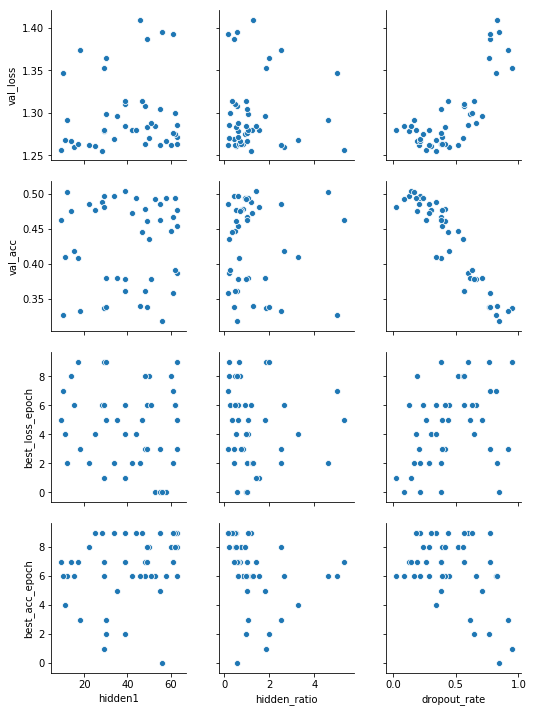

In [10]:
sns.pairplot(gru_results, x_vars=indep_vars, y_vars=dep_vars)
             #[gru_results.hidden1 > 30], x_vars=indep_vars, y_vars=dep_vars)

((56,), (56,))